In [12]:
import numpy as np
import matplotlib.pyplot as plt

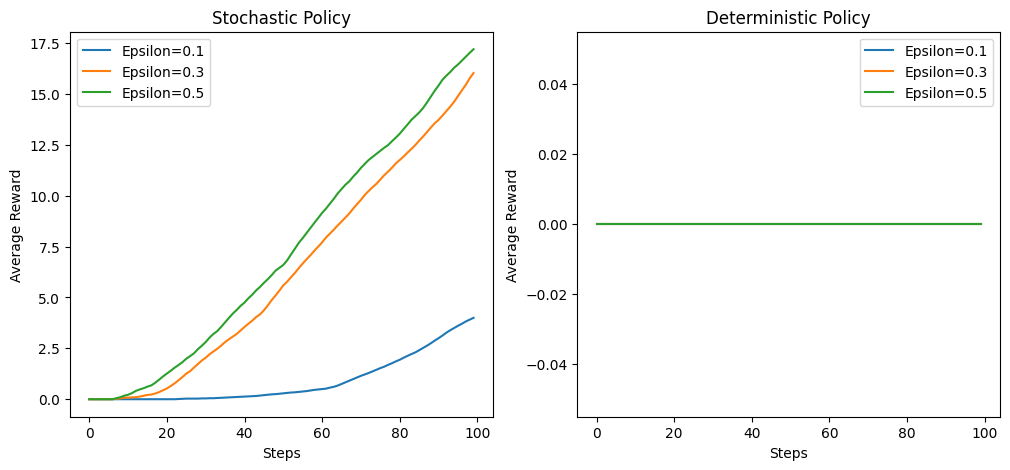

In [14]:
class Gridworld:
    def __init__(self, size):
        self.size = size
        self.start_state = (0,0)
        self.goal_state = (size -1, size-1)
        self.current_state = self.start_state
        
    def step (self, action):
        if action == 0:
            self.current_state = (self.current_state[0], min(self.current_state[1]+1, self.size-1))
        elif action == 1:
            self.current_state = (max(self.current_state[0]-1,0), self.current_state[1])
        elif action == 2:
            self.current_state = (self.current_state[0], max(self.current_state[1]-1,0))
        else:
            self.current_state = (min(self.current_state[0]+1, self.size-1), self.current_state[1])
        
        if self.current_state == self.goal_state:
            return 1, self.goal_state
        else:
            return 0, self.current_state

def epsilon_greedy(Q, epsilon):
    if np.random.uniform()<epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

def greedy(Q):
    return np.argmax(Q)


size = 4
n_steps = 100
n_trials = 100
epsilons = [0.1, 0.3, 0.5]

stochastic_policy_rewards = np.zeros((len(epsilons), n_steps))
deterministic_policy_rewards = np.zeros((len(epsilons), n_steps))

for i, epsilon in enumerate(epsilons):
    for j in range(n_trials):
        gridworld = Gridworld(size)
        Q = np.zeros((size, size, 4))
        total_reward = 0
        rewards = np.zeros(n_steps)
        
        for step in range(n_steps):
            action = epsilon_greedy(Q[gridworld.current_state], epsilon)
            reward, next_state = gridworld.step(action)
            total_reward += reward
            rewards[step] = total_reward
            Q[gridworld.current_state][action] += (reward - Q[gridworld.current_state][action])/ (j+1)
            
        stochastic_policy_rewards[i] += rewards/n_trials

    for j in range(n_trials):
        gridworld = Gridworld(size)
        Q = np.zeros((size, size, 4))
        total_reward = 0
        rewards = np.zeros(n_steps)
        
        for step in range(n_steps):
            action = greedy(Q[gridworld.current_state])
            reward, next_state = gridworld.step(action)
            total_reward += reward
            rewards[step] = total_reward
            Q[gridworld.current_state][action] += (reward - Q[gridworld.current_state][action])/ (j+1)
            
        deterministic_policy_rewards[i] += rewards/n_trials

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(stochastic_policy_rewards[i], label="Epsilon={}".format(epsilon))
    axs[1].plot(deterministic_policy_rewards[i], label="Epsilon={}".format(epsilon))

axs[0].set_title('Stochastic Policy')
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Average Reward')
axs[0].legend()

axs[1].set_title('Deterministic Policy')
axs[1].set_xlabel('Steps')
axs[1].set_ylabel('Average Reward')
axs[1].legend()
plt.show()







